# Simulate

author: steeve laquitaine

Simulate predictions for the standard Bayesian model.

## Setup

In [15]:
# go to the project's root path
import os
os.chdir("..")

In [16]:
# import dependencies
from bsfit.nodes.models.bayes import StandardBayes
from bsfit.nodes.dataEng import (
    simulate_dataset,
)
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Set the parameters

In [17]:
# set the parameters
SUBJECT = "sub01"
PRIOR_SHAPE = "vonMisesPrior"
PRIOR_MODE = 225
OBJ_FUN = "maxLLH"
READOUT = "map"
PRIOR_NOISE = [80, 40]      # e.g., prior's std
STIM_NOISE = [0.33, 0.66, 1.0]
SIM_P = {
    "k_llh": [2.7, 10.7, 33],
    "k_prior": [2.7, 33],
    "k_card": [1],
    "prior_tail": [0],
    "p_rand": [0],
    "k_m": [2000],
}
GRANULARITY = "mean"
CENTERING = True

## Simulate a dataset

In [18]:
# simulate a training dataset
train_dataset = simulate_dataset(
    stim_noise=STIM_NOISE,
    prior_mode=PRIOR_MODE,
    prior_noise=PRIOR_NOISE,
    prior_shape=PRIOR_SHAPE,
)

# use the train dataset as test to show 
# best predictions
test_dataset = get_data(train_dataset)

## Simulate the model mean predictions

Running simulation ...

Calculating predictions ...

-logl:50265.93, aic:100549.87, kl:[ 2.7 10.7 33. ], kp:[ 2.7 33. ], kc:[1.], pt:0.00, pr:0.00, km:2000.00


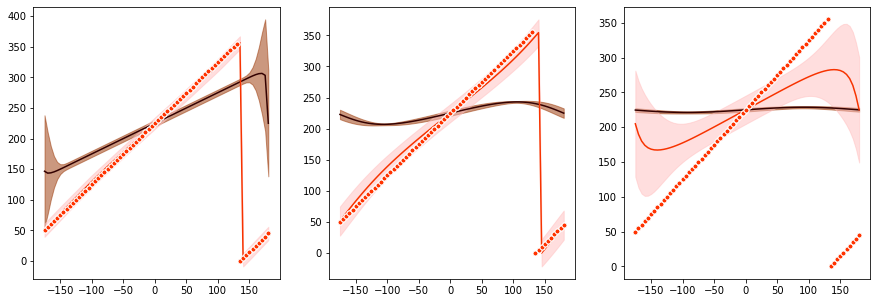


Simulation is complete !


In [19]:
# instantiate the model
model = StandardBayes(
    prior_shape=PRIOR_SHAPE, 
    prior_mode=PRIOR_MODE, 
    readout=READOUT
    )

# simulate predictions
plt.figure(figsize=(15,5))
model = model.simulate(
    dataset=train_dataset,
    sim_p=SIM_P,
    granularity=GRANULARITY,
    centering=CENTERING,
)

Tutorial complete !